In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import DistanceMetric

import scipy
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
n_samples = 500

# generate random sample, two components
np.random.seed(5)

# generate spherical data centered on (10, 5)
shifted_gaussian = np.random.randn(n_samples, 2) * 2. + np.array([10, 8])

# generate spherical data centered on (0, 0)
shifted_gaussian1 = np.random.randn(n_samples, 2) * 1.5 + np.array([-5, 8])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
x = np.vstack([shifted_gaussian, stretched_gaussian, shifted_gaussian1])

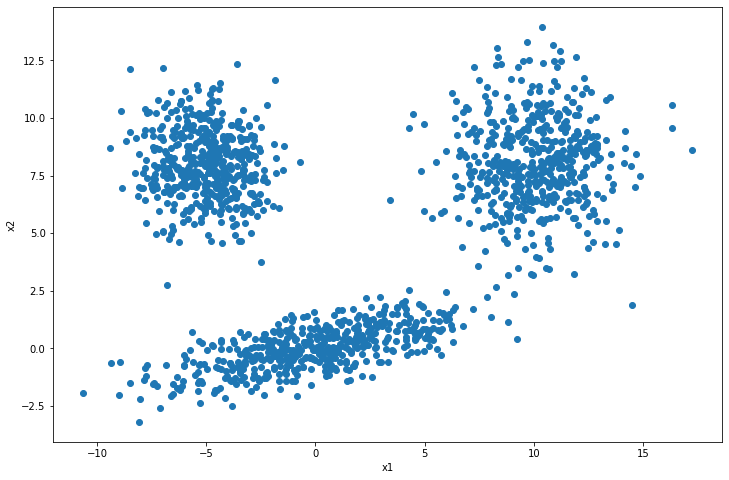

In [3]:
plt.figure(figsize=(12, 8))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
def plot_2d_clusters(centers, x, clusters):
    plt.figure(figsize=(12, 8))
    for k in range(len(centers)):
        plt.scatter(x[:,0][clusters == k], x[:,1][clusters == k])
    plt.scatter(centers[:,0], centers[:,1], marker='x', s=100)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

## Sklearn K-Means

In [5]:
K = 3
km = KMeans(K)
cl = km.fit_predict(x)

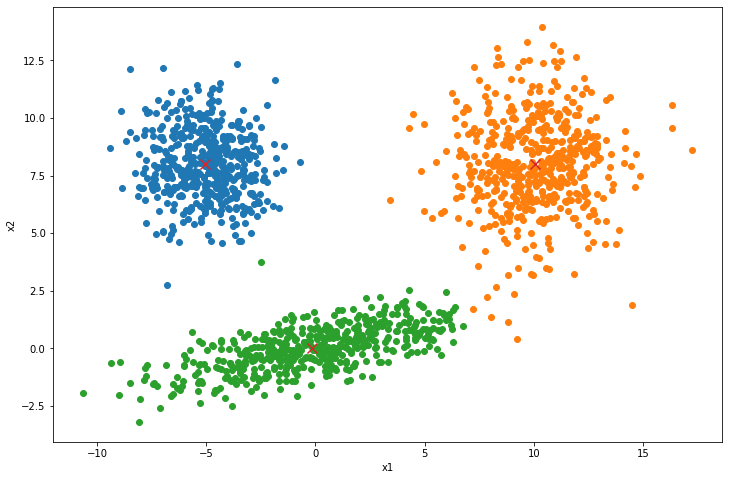

In [6]:
plot_2d_clusters(km.cluster_centers_, x, cl)

In [8]:
km.inertia_

12495.681558679233

In [9]:
silhouette_avg = silhouette_score(x, cl)
silhouette_avg

0.6702267212128543

In [11]:
xs = silhouette_samples(x, cl)
xs

array([0.79797151, 0.68387178, 0.74733552, ..., 0.7657826 , 0.78129367,
       0.23794911])

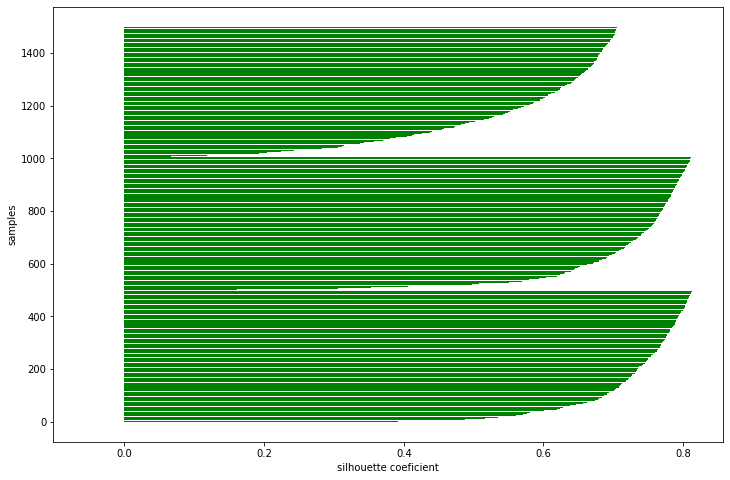

In [12]:
c = 0
plt.figure(figsize=(12, 8))
for k in range(K):
    p = np.sort(xs[cl == k])
    plt.barh(range(c, c + len(p)), p, align='center', color='green')
    c = c + len(p)
plt.xlabel('silhouette coeficient')
plt.ylabel('samples')
plt.show()

In [13]:
d = []
for k in range(1,11):
    km = KMeans(k).fit(x)
    sc = silhouette_score(x, km.predict(x)) if k > 1 else None
    d.append([k, km.inertia_, sc])
d = np.array(d)

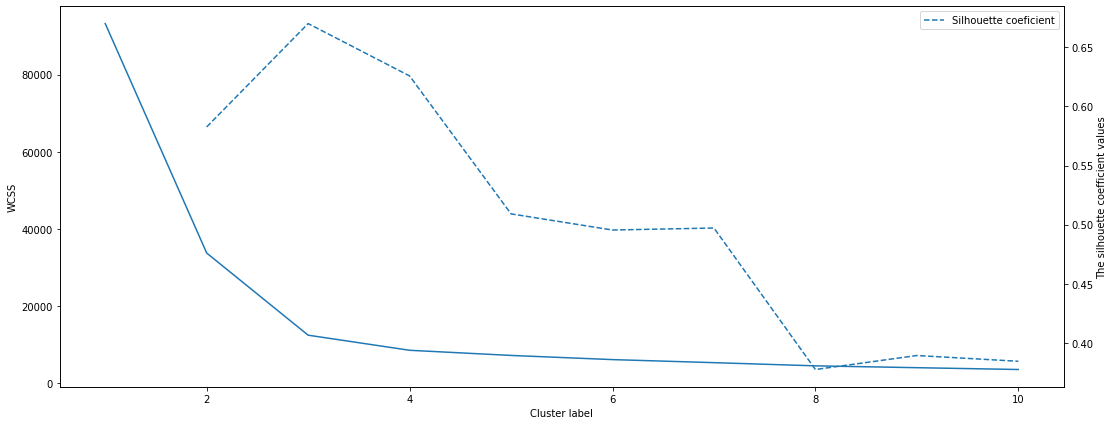

In [14]:
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)
ax1.plot(d[:,0], d[:,1], label = 'WCSS')
ax2 = ax1.twinx()
ax2.plot(d[:,0], d[:,2], '--', label = 'Silhouette coeficient')
ax1.set_xlabel("Cluster label")
ax1.set_ylabel("WCSS")
ax2.set_ylabel("The silhouette coefficient values")
plt.legend()
plt.show()

## K-Means in steps

In [15]:
K = 3

Pick random K points as initial cluster centers

In [16]:
C = x[np.random.choice(range(len(x)), K)]

Calculate point distances to cluster centers

In [17]:
D = np.zeros((len(x),K))
for i, c in enumerate(C):
    D[:,i] = np.sum(np.power(x - c, 2), axis=1)

Convert distances to clusters

In [18]:
cl = np.argmin(D,axis=1)

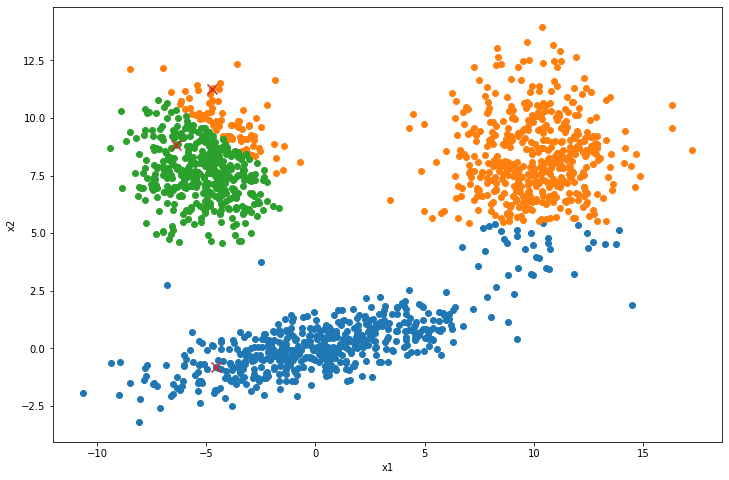

In [19]:
plot_2d_clusters(C, x, cl)

Re-align cluster centers

In [20]:
for k in range(K):
    C[k] = np.mean(x[cl == k], axis=0)

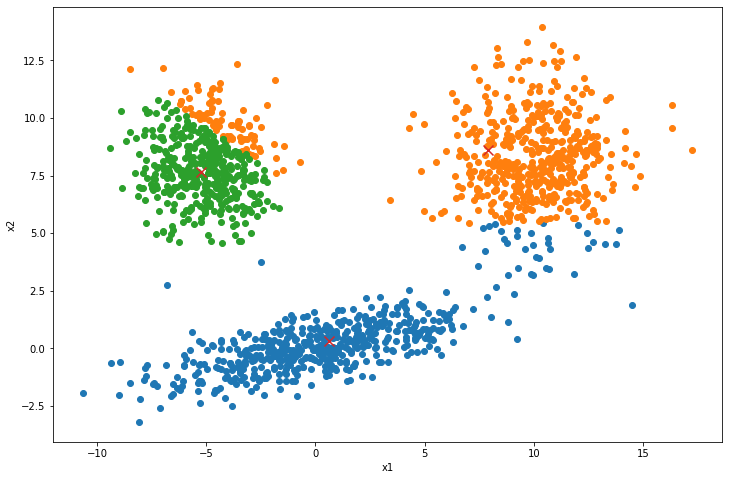

In [21]:
plot_2d_clusters(C, x, cl)

## K-Means

In [22]:
def K_Means(K, X):
    
    C = X[np.random.choice(range(len(X)), K)]
    
    while True:

        C_prev = np.copy(C)
        
        # E-step
        D = np.zeros((len(X),K))
        for i, c in enumerate(C):
            D[:,i] = np.sum(np.power(X - c, 2), axis=1)
        cl = np.argmin(D, axis=1)

        # M-step
        for k in range(K):
            if np.any(cl == k):
                C[k] = np.mean(X[cl == k], axis=0)

        # plot_2d_clusters(C, x, cl)
            
        if np.all(C == C_prev): break
        
    D = np.zeros((len(X),K))
    for i, c in enumerate(C):
        D[:,i] = np.sum(np.power(X - c, 2), axis=1)
        
    return np.sum(np.min(D, axis=1)), C, cl

In [23]:
d, C, cl = K_Means(3, x)

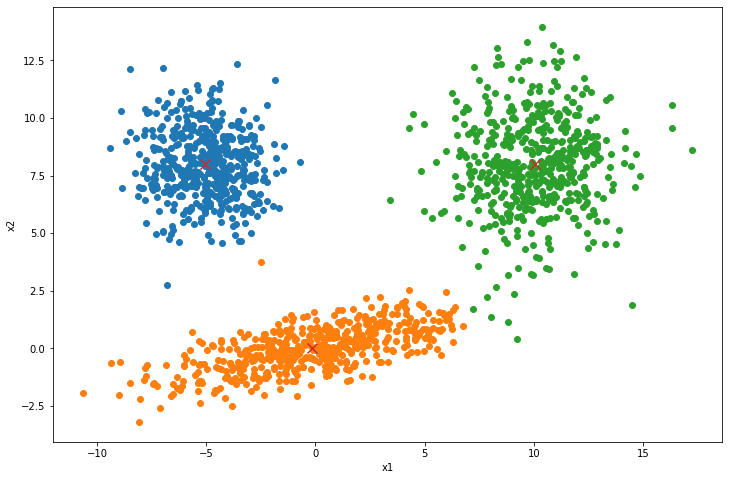

In [24]:
plot_2d_clusters(C, x, cl)

In [25]:
d

12495.681558679233

In [26]:
silhouette_avg = silhouette_score(x, cl)
silhouette_avg

0.6702267212128543

In [27]:
s = np.zeros(len(x))

for i in range(len(x)):
    
    # Inner-cluster average distance
    a1 = np.sum(np.power(x[i] - x[cl == cl[i]], 2), axis = 1)
    a = np.sum(a1) / (len(a1) - 1)
    
    # Smallest intra-cluster average distance
    bm = cl != cl[i]
    b1 = np.sum(np.power(x[i] - x[bm], 2), axis=1)
    
    b = float("inf")
    for j in np.unique(cl[bm]):
        b2 = b1[cl[bm] == j]
        b3 = np.sum(b2) / len(b2)
        if b > b3: b = b3
    
    s[i] = (b - a) / max(a, b)


In [28]:
np.mean(s)

0.8435295755731751

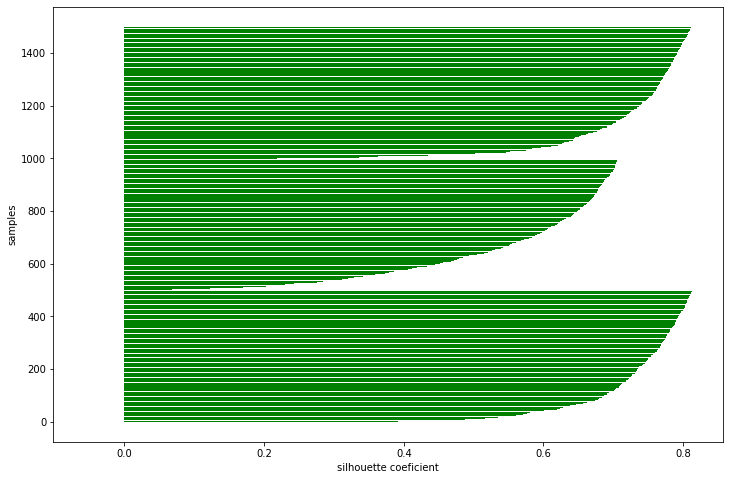

In [29]:
c = 0
plt.figure(figsize=(12, 8))
for k in range(K):
    p = np.sort(xs[cl == k])
    plt.barh(range(c, c + len(p)), p, align='center', color='green')
    c = c + len(p)
plt.xlabel('silhouette coeficient')
plt.ylabel('samples')
plt.show()

In [30]:
D = []
for k in range(1, 11):
    d, _, _ = K_Means(k, x)
    D.append([k, d])
D = np.array(D)

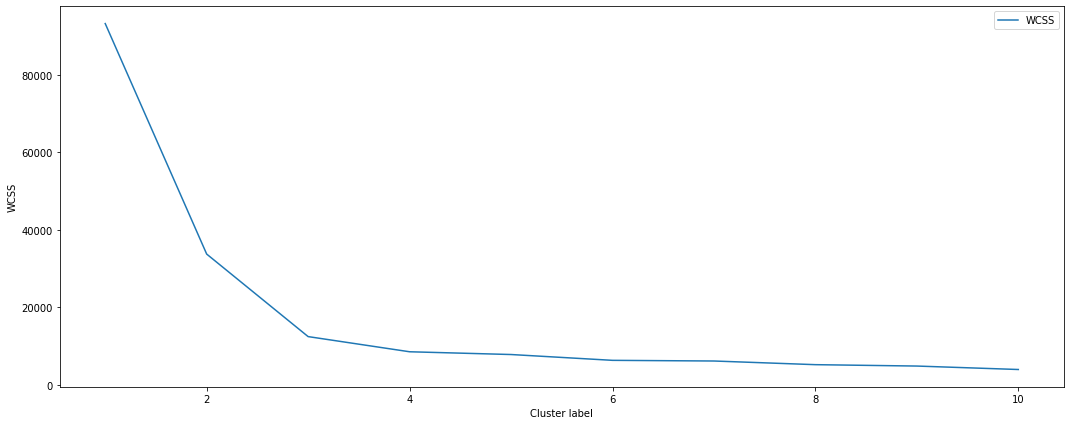

In [31]:
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)
ax1.plot(D[:,0], D[:,1], label = 'WCSS')
ax1.set_xlabel("Cluster label")
ax1.set_ylabel("WCSS")
plt.legend()
plt.show()

## K-Means++

In [32]:
X_ = np.array([0,1,2,3,4])
X_

array([0, 1, 2, 3, 4])

In [33]:
C_ = [X_[0]]
C_

[0]

In [34]:
D_ = [min([np.inner(c-x,c-x) for c in C_]) for x in X_]
D_

[0, 1, 4, 9, 16]

In [35]:
P_ = D_ / np.sum(D_)
P_

array([0.        , 0.03333333, 0.13333333, 0.3       , 0.53333333])

In [36]:
C_.append(np.random.choice(X_, p = P_))
C_

[0, 4]

In [37]:
D_ = [min([np.inner(c-x,c-x) for c in C_]) for x in X_]
D_

[0, 1, 4, 1, 0]

In [38]:
P_ = D_ / np.sum(D_)
P_

array([0.        , 0.16666667, 0.66666667, 0.16666667, 0.        ])

In [39]:
C_.append(np.random.choice(X_, p = P_))
C_

[0, 4, 2]

In [40]:
def initialize(K, X):
    C = [X[0]]
    for k in range(1, K):
        D = [min([np.inner(c-x,c-x) for c in C]) for x in X]
        P = D / np.sum(D)
        C.append(X[np.random.choice(range(len(X)), p = P)])
    return C

In [41]:
initialize(3, X_)

[0, 3, 1]

In [42]:
def K_Means_pp(K, X):
    
    C = initialize(K, X)
    
    while True:

        C_prev = np.copy(C)
        
        # E-step
        D = np.zeros((len(X),K))
        for i, c in enumerate(C):
            D[:,i] = np.sum(np.power(X - c, 2), axis=1)
        cl = np.argmin(D, axis=1)

        # M-step
        for k in range(K):
            if np.any(cl == k):
                C[k] = np.mean(X[cl == k], axis=0).tolist()

        # plot_2d_clusters(C, x, cl)
            
        if np.all(C == C_prev): break
        
    D = np.zeros((len(X),K))
    for i, c in enumerate(C):
        D[:,i] = np.sum(np.power(X - c, 2), axis=1)
        
    return np.sum(np.min(D, axis=1)), np.array(C), cl

In [43]:
d, C, cl = K_Means_pp(3, x)

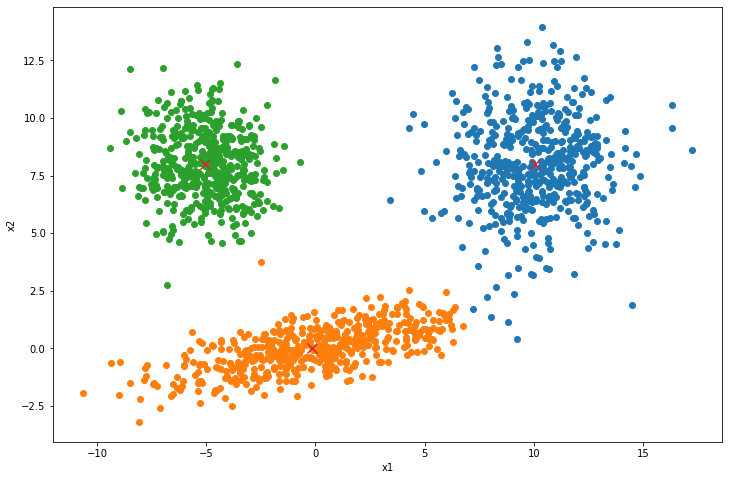

In [44]:
plot_2d_clusters(C, x, cl)

In [45]:
d

12495.681558679233

In [46]:
D = []
for k in range(1, 11):
    d, _, _ = K_Means_pp(k, x)
    D.append([k, d])
D = np.array(D)

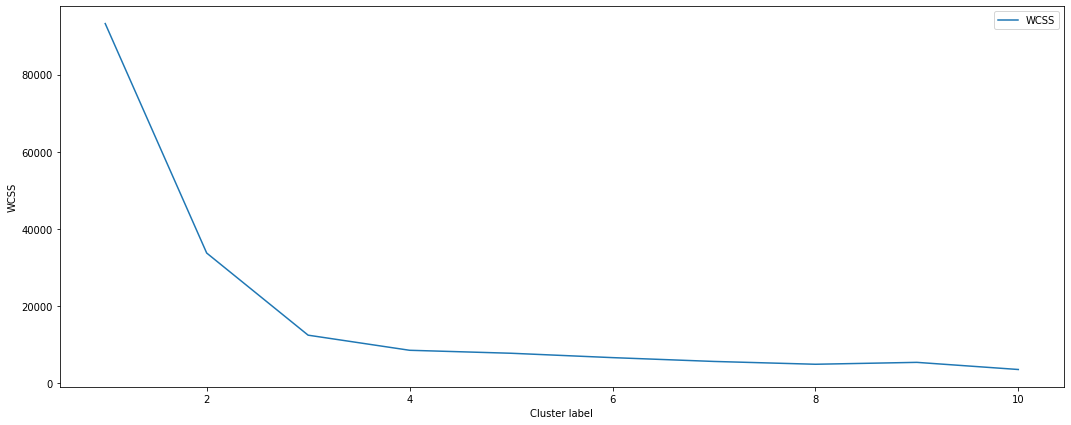

In [47]:
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)
ax1.plot(D[:,0], D[:,1], label = 'WCSS')
ax1.set_xlabel("Cluster label")
ax1.set_ylabel("WCSS")
plt.legend()
plt.show()

## Distances

In [48]:
A = [[1, 1], [2, 2]]
B = [[3, 3], [5, 5]]

In [49]:
DistanceMetric.get_metric('manhattan').pairwise(A,B)

array([[4., 8.],
       [2., 6.]])

In [50]:
DistanceMetric.get_metric('euclidean').pairwise(A,B)

array([[2.82842712, 5.65685425],
       [1.41421356, 4.24264069]])

In [51]:
DistanceMetric.get_metric('minkowski', p = 3).pairwise(A,B)

array([[2.5198421 , 5.0396842 ],
       [1.25992105, 3.77976315]])